The general idea of hypothesis testing involves:

* Making an initial assumption.
* Collecting evidence (data).
* Based on the available evidence (data), deciding whether to reject or not reject the initial assumption.

# Example

Consider the population of many, many adults. A researcher hypothesizes that the average adult body temperature is lower than the often-advertised 98.6 degrees F. That is, the researcher wants an answer to the question: "Is the average adult body temperature 98.6 degrees? Or is it lower?" To answer his research question, the researcher starts by assuming that the average adult body temperature was 98.6 degrees F. This is called a 'null hypothesis'.

Null Hypthesis $H_0$: Average adult body temperature is 98.6 degrees F.

Alt. Hypothesis $H_1$: Average adult body temperature is lower than 98.6 degrees F.

Then, the researcher goes out and tries to find evidence that refutes his initial assumption. In doing so, he selects a random sample of 130 adults. The average body temperature of the 130 sampled adults is 98.25 degrees.

Then, the researcher uses the data he collected to make a decision about his initial assumption. It is either likely or unlikely that the researcher would collect the evidence he did given his initial assumption that the average adult body temperature is 98.6 degrees:

* If it is likely, then the researcher does not reject his initial assumption that the average adult body temperature is 98.6 degrees. There is not enough evidence to do otherwise.

* If it is unlikely, then:
        
        - either the researcher's initial assumption is correct and he experienced a very unusual event;
        - or the researcher's initial assumption is incorrect.

In statistics, we generally don't make claims that require us to believe that a very unusual event happened. That is, in the practice of statistics, if the evidence (data) we collected is unlikely in light of the initial assumption, then we reject our initial assumption.

# Making the Decision

In statistics, there are two ways to determine whether the evidence is likely or unlikely given the initial assumption:

* We could take the "critical value approach" (favored in many of the older textbooks).
* Or, we could take the "P-value approach" (what is used most often in research, journal articles, and statistical software).

# Errors in Hypothesis Testing

**Type I error**: The null hypothesis is rejected when it is true.

**Type II error**: The null hypothesis is not rejected when it is false.

# Critical Value Approach

1. Specify the null and alternative hypotheses.

2. Using the sample data and assuming the null hypothesis is true, calculate the value of the test statistic. To conduct the hypothesis test for the population mean $\mu$, we use the t-statistic $t =\dfrac {\bar{x}− \mu} {s / \sqrt{n}}$ which follows a t-distribution with n - 1 degrees of freedom (s is the stddev of the sample).

3. Determine the critical value by finding the value of the known distribution of the test statistic such that the probability of making a Type I error — which is denoted α (greek letter "alpha") and is called the "significance level of the test" — is small (typically 0.01, 0.05, or 0.10).

4. Compare the test statistic to the critical value. If the test statistic is more extreme in the direction of the alternative than the critical value, reject the null hypothesis in favor of the alternative hypothesis. If the test statistic is less extreme than the critical value, do not reject the null hypothesis.

# P-value Approach

1. Specify the null and alternative hypotheses.

2. Using the sample data and assuming the null hypothesis is true, calculate the value of the test statistic. Again, to conduct the hypothesis test for the population mean $\mu$, we use the t-statistic $t = \dfrac {\bar{x} - \mu} {s / \sqrt{n}}$
which follows a t-distribution with n - 1 degrees of freedom.

3. Using the known distribution of the test statistic, calculate the P-value: "If the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic in the direction of the alternative hypothesis than we did?" 

4. Set the significance level, α, the probability of making a Type I error to be small — 0.01, 0.05, or 0.10. Compare the P-value to α. If the P-value is less than (or equal to) α, reject the null hypothesis in favor of the alternative hypothesis. If the P-value is greater than α, do not reject the null hypothesis.

# Example: 2-tailed Test

A manufacturer claims that the thickness of the spearmint gum it produces is 7.5 one-hundredths of an inch. A quality control specialist regularly checks this claim. On one production run, he took a random sample of n = 10 pieces of gum and measured their thickness.

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.array([7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50])

$H_0$: $\mu = 7.5$

$H_1$: $\mu \neq 7.5$

In [3]:
sample_mean = np.mean(data)
sample_stddev = np.std(data, ddof=1)

# Assuming null hypothesis is true:
population_mean = 7.5
n = len(data)
t_stat = (sample_mean - population_mean) / (sample_stddev / np.sqrt(n))
print('t-statistic = {:.2f}'.format(t_stat))

t-statistic = 1.54


The assumptions here are:

* The sample mean follows normal distribution assuming the null hypothesis is true.
* The t-statistic follows Student's t-distribution assuming the null hypothesis is true.
* Population variance = sample variance.

Let us set the significance level of the test as

In [4]:
sig_level = 0.05

If we're using the p-value approach, we'll need to find the probability of having a more extreme value than the test statistic.

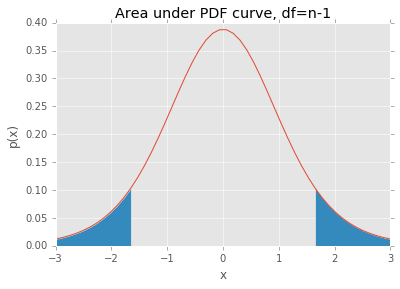

In [5]:
from scipy.stats import t

x = np.linspace(-3, 3, num=50)
y = t.pdf(x, df=n-1)

figure, ax = pylab.subplots(1, 1)
pylab.plot(x, y)
ax.fill_between(x, 0, y, where=x > abs(t_stat))
ax.fill_between(x, 0, y, where=x < -abs(t_stat))
pylab.title("Area under PDF curve, df=n-1")
pylab.xlabel('x')
pylab.ylabel('p(x)');

In [6]:
p_val = 2 * t.sf(t_stat, df=n-1)

In [7]:
print('P-value={:.2f} at significance level={:.2f}'.format(p_val, sig_level))

P-value=0.16 at significance level=0.05


Since P-value of observing a test statistic more extreme than the test statistic is > the significance level, we fail to reject the null hypothesis.

# Example: Right-tailed Test

Example: Right-tailed test

An engineer measured the Brinell hardness of 25 pieces of ductile iron that were subcritically annealed. The resulting data were:

170 	167 	174 	179 	179
156 	163 	156 	187 	156
183 	179 	174 	179 	170
156 	187 	179 	183 	174
187 	167 	159 	170 	179

Conduct a hypothesis test with $H_0$: the mean Brinell hardness of all such ductile iron pieces is greater than 170.

$H_0$: Mean Brinell hardness of all such ductile iron pieces > 170.

$H_{alt}$: Mean Brinell hardness of all such ductile iron pieces is less than 170.

In [8]:
data = np.array([170, 167, 174, 179, 179, 156, 163, 156, 187, 156, 183,
                 179, 174, 179, 170, 156, 187, 179, 183, 174, 187, 167, 159, 
                 170, 179])

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

In [9]:
population_mean = 170
n = len(data)
t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

print('t_stat = {:.2f}'.format(t_stat))

t_stat = 1.22


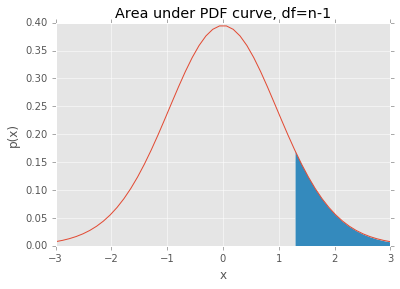

In [10]:
from scipy.stats import t

x = np.linspace(-3, 3, num=50)
y = t.pdf(x, df=n-1)

figure, ax = pylab.subplots(1, 1)
pylab.plot(x, y)
ax.fill_between(x, 0, y, where=x > abs(t_stat))
pylab.title("Area under PDF curve, df=n-1")
pylab.xlabel('x')
pylab.ylabel('p(x)');

In [11]:
p_val = t.sf(t_stat, df=n-1)
sig_level = 0.05
print('P-value={:.2f} at significance level={:.2f}'.format(p_val, sig_level))

P-value=0.12 at significance level=0.05


Since the p_value is greater than the significance level, we fail to reject the null hypothesis.

# Example: Left-tailed Test

A biologist was interested in determining whether sunflower seedlings treated with an extract from Vinca minor roots resulted in a lower average height of sunflower seedlings than the standard height of 15.7 cm. The biologist treated a random sample of n = 33 seedlings with the extract and subsequently obtained the following heights:


    11.5 	11.8 	15.7 	16.1 	14.1 	10.5
    15.2 	19.0 	12.8 	12.4 	19.2 	13.5
    16.5 	13.5 	14.4 	16.7 	10.9 	13.0
    15.1 	17.1 	13.3 	12.4 	8.5 	14.3
    12.9 	11.1 	15.0 	13.3 	15.8 	13.5
    9.3 	12.2 	10.3


Here, 

$H_0$: Average height of sunflower seedlings < 15.7 cm.

$H_{alt}$: Average height of sunflower seedlings $\geq$ 15.7 cm.

In [12]:
data = np.array([
    11.5,     11.8,     15.7,     16.1,    14.1,     10.5,
15.2,    19.0,     12.8,     12.4,     19.2,     13.5,
16.5,     13.5,     14.4,    16.7,     10.9,     13.0,
15.1,     17.1,     13.3,     12.4,     8.5,     14.3,
12.9,     11.1,     15.0,     13.3,     15.8,     13.5,
9.3,     12.2,     10.3])

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

population_mean = 15.7
n = len(data)
t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
print('t_stat = {:.2f}'.format(t_stat))

t_stat = -4.60


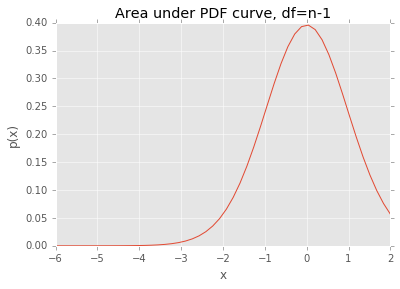

In [13]:
from scipy.stats import t

x = np.linspace(-6, 2, num=50)
y = t.pdf(x, df=n-1)

figure, ax = pylab.subplots(1, 1)
pylab.plot(x, y)
ax.fill_between(x, 0, y, where=x < t_stat)
pylab.title("Area under PDF curve, df=n-1")
pylab.xlabel('x')
pylab.ylabel('p(x)');

In [14]:
p_val = t.sf(t_stat, df=n-1)
sig_level = 0.05
print('P-value={:.2f} at significance level={:.2f}'.format(p_val, sig_level))

P-value=1.00 at significance level=0.05


Since p-value is > the significance level, we fail to reject the null hypothesis. Thus, the biologist concludes that the mean height of all such sunflower seedlings is less than 15.7 cm.

# Power of a Test

The probability of not committing a type-II error is called the power of a test.

# Factors Affecting the Power of a Test

* Sample Size: As sample size increases, the probability of not committing a type-II error increases, so the power also increases.

* Significance level: The higher the significance level, the higher the power of the test.

* The "true" value of the parameter being tested: The greater the difference between the "true" value of a parameter and the value specified in the null hypothesis, the greater the power of the test. That is, the greater the effect size, the greater the power of the test.

# Why is Power Analysis Important?

Consider a research experiment where the p-value computed from the data was 0.12. As a result, one would fail to reject the null hypothesis because this p-value is larger than α = 0.05. However, there still exist two possible cases for which we failed to reject the null hypothesis:

* The null hypothesis is a reasonable conclusion,
* The sample size is not large enough to either accept or reject the null hypothesis, i.e., additional samples might provide additional evidence.

Power analysis is the procedure that researchers can use to determine if the test contains enough power to make a reasonable conclusion. From another perspective power analysis can also be used to calculate the number of samples required to achieve a specified level of power.